In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import time
import pickle
import gc
import sklearn
import ast
import umap
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe"

# DType warning when importing .csv files with parsed PMIDs. Avoid showing the warning
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [27]:
sortedDFs_output = input().strip()

 E:\sciAbstractsProject_sortedDFs\


In [28]:
# Extract and add names of files in directories containing .csv files to a list, keep only .csv files
sorted_DFs = []
for root, dirs, files in os.walk(sortedDFs_output):
        for file in files:
            if file[-4:] == ".csv":
                sorted_DFs.append(os.path.join(root, file))

In [34]:
df = pd.read_csv(sorted_DFs[0])
df = df[["PMID", "Title", "Abstract"]]

In [30]:
df.to_csv(os.path.join(r"C:\Users\svalb\OneDrive\Desktop\input_prueba_embeddings.csv"))

In [35]:
df

,PMID,Title,Abstract
0,10217319,"Isolation, purity analysis and stability of hy...",In 1996 131.5 million daily doses of preparati...
1,10217320,Electron-microscopic study of the bactericidal...,"The bactericidal activity of OPB-2045 (1-(3,4-..."
2,10217321,A novel image-analysis technique for measureme...,Cell-surface hydrophobicity is different for S...
3,10217322,Effect of the chloroform extract of Tanacetum ...,This study examines the anti-ulcerogenic activ...
4,10217323,Lavender oil inhibits immediate-type allergic ...,We studied the effects of lavender oil on mast...
...,...,...,...
99995,10416799,A standardized blood sampling scheme in quanti...,Quantitative estimation of brain glucose metab...
99996,10416800,Resampling of data between arbitrary grids usi...,For certain medical applications resampling of...
99997,10416801,Simultaneous maximum a posteriori reconstructi...,In order to perform attenuation correction in ...
99998,10416802,Registration of stereo and temporal images of ...,The registration of retinal images is required...


In [2]:
df_embeddings = pd.read_csv(r"C:\Users\svalb\Downloads\output_prueba_embeddings.csv")

In [3]:
colnames = []
for el in range(768):
    colnames.append("Embedding_"+str(el))

In [4]:
df_embeddings["AbstractEmbedding_list"] = df_embeddings["AbstractEmbedding"].apply(ast.literal_eval)

In [5]:
df_embeddings[colnames] = df_embeddings["AbstractEmbedding_list"].to_list()

C:\Users\svalb\AppData\Local\Temp\ipykernel_12616\1936338203.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\svalb\AppData\Local\Temp\ipykernel_12616\1936338203.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\svalb\AppData\Local\Temp\ipykernel_12616\1936338203.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [6]:
df_embeddings

,Unnamed: 0.1,Unnamed: 0,PMID,Abstract,AbstractEmbedding,AbstractEmbedding_list,Embedding_0,Embedding_1,Embedding_2,Embedding_3,...,Embedding_758,Embedding_759,Embedding_760,Embedding_761,Embedding_762,Embedding_763,Embedding_764,Embedding_765,Embedding_766,Embedding_767
0,0,0,10217319,In 1996 131.5 million daily doses of preparati...,"[2.419851064682007, 1.0296319723129272, -3.059...","[2.419851064682007, 1.0296319723129272, -3.059...",2.419851,1.029632,-3.059437,-0.532205,...,2.197877,0.079391,-0.064363,-1.016690,1.337435,0.260783,0.441314,-0.751909,0.009283,-0.799867
1,1,1,10217320,"The bactericidal activity of OPB-2045 (1-(3,4-...","[0.5562273859977722, 0.013432393781840801, -2....","[0.5562273859977722, 0.013432393781840801, -2....",0.556227,0.013432,-2.730033,0.172090,...,1.838406,0.572986,0.715281,0.028480,0.811890,-0.358657,-0.989207,-0.660346,-0.614186,-0.929164
2,2,2,10217321,Cell-surface hydrophobicity is different for S...,"[1.606918454170227, 0.43282148241996765, -3.27...","[1.606918454170227, 0.43282148241996765, -3.27...",1.606918,0.432821,-3.270077,-1.057154,...,1.783862,0.255779,0.196218,-0.555957,0.794233,0.817375,-1.367937,-1.304561,-0.787497,0.116103
3,3,3,10217322,This study examines the anti-ulcerogenic activ...,"[1.1330265998840332, 0.9824218153953552, -3.66...","[1.1330265998840332, 0.9824218153953552, -3.66...",1.133027,0.982422,-3.665292,-0.457186,...,1.486870,0.609959,0.638437,-0.044965,1.211419,0.319683,-0.551842,-0.718473,-0.669075,-0.969869
4,4,4,10217323,We studied the effects of lavender oil on mast...,"[1.1075258255004883, 0.520980715751648, -3.455...","[1.1075258255004883, 0.520980715751648, -3.455...",1.107526,0.520981,-3.455070,-1.413161,...,2.301317,0.348406,0.599030,-0.645653,0.788856,0.628204,-0.634708,-0.573979,-0.254359,-0.959601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,99995,10416799,Quantitative estimation of brain glucose metab...,"[1.4995638132095337, 1.238935947418213, -3.201...","[1.4995638132095337, 1.238935947418213, -3.201...",1.499564,1.238936,-3.201400,-0.720011,...,2.678557,0.421602,0.415155,-1.326157,1.405952,1.036356,-0.356599,-0.400250,-0.090615,0.111533
99996,99996,99996,10416800,For certain medical applications resampling of...,"[1.1978322267532349, 0.8580331206321716, -3.38...","[1.1978322267532349, 0.8580331206321716, -3.38...",1.197832,0.858033,-3.388749,-1.440629,...,3.164993,0.038642,0.509759,-0.734433,0.204175,0.341538,-0.067037,-0.494020,-0.942002,0.378228
99997,99997,99997,10416801,In order to perform attenuation correction in ...,"[0.8153030872344971, 0.005797678139060736, -3....","[0.8153030872344971, 0.005797678139060736, -3....",0.815303,0.005798,-3.489474,-1.001398,...,2.111139,-0.285224,0.947869,-1.055264,0.938516,0.668372,-0.215386,-0.444506,0.426120,-0.702853
99998,99998,99998,10416802,The registration of retinal images is required...,"[0.2658553719520569, 0.7341721653938293, -3.38...","[0.2658553719520569, 0.7341721653938293, -3.38...",0.265855,0.734172,-3.388030,-0.692140,...,2.423302,0.814187,0.624416,-0.677549,0.298395,1.127480,0.253009,-0.960433,-0.645305,1.103171


In [7]:
pca = sklearn.decomposition.PCA()
pca.fit_transform(df_embeddings[colnames])

array([[-8.50456986e-02,  1.16210807e+00,  7.97925341e-01, ...,
        -1.01174077e-01,  1.71077487e-01, -1.41606807e-07],
       [ 7.11819577e-01, -2.57987029e+00, -1.43065685e+00, ...,
         8.62754074e-03,  4.79079904e-02,  9.13698350e-09],
       [-2.60521297e+00, -1.04686332e+00, -1.02436820e+00, ...,
        -7.92156274e-02, -1.27921952e-02, -1.11862965e-07],
       ...,
       [ 3.92320456e-01,  2.26117222e+00, -1.26597920e+00, ...,
         6.44707571e-02,  1.07370306e-01, -4.55405521e-08],
       [ 3.49719476e-01,  1.65200193e+00, -6.30923435e-01, ...,
         6.20936228e-02,  4.90945272e-03,  1.46360490e-07],
       [ 1.10024304e+00,  1.77348503e+00, -2.07758543e+00, ...,
         5.68806512e-02, -8.00594895e-04,  3.79891349e-08]])

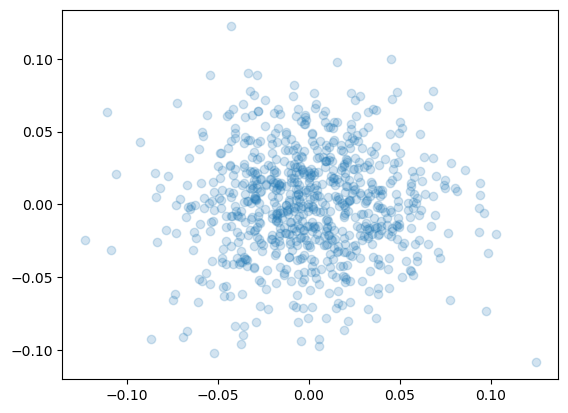

In [8]:
plt.scatter(x= pca.components_[0], y= pca.components_[1], alpha=0.2)
plt.show()

In [9]:
pca.explained_variance_ratio_

array([6.29154831e-02, 2.82359265e-02, 2.69808120e-02, 2.31034754e-02,
       2.27262367e-02, 2.00355007e-02, 1.67337279e-02, 1.51803674e-02,
       1.43459519e-02, 1.32702890e-02, 1.21267380e-02, 1.14643902e-02,
       1.13618486e-02, 1.05551412e-02, 9.59142376e-03, 9.38183064e-03,
       8.69436066e-03, 8.55081881e-03, 8.40576602e-03, 8.19390543e-03,
       7.94876957e-03, 7.54664929e-03, 7.39221426e-03, 7.22391183e-03,
       7.07316349e-03, 6.88283331e-03, 6.67282943e-03, 6.61953072e-03,
       6.41874608e-03, 6.26380099e-03, 6.09569930e-03, 5.95510446e-03,
       5.82121435e-03, 5.74607002e-03, 5.62247167e-03, 5.38259834e-03,
       5.36173865e-03, 5.20295478e-03, 5.07195452e-03, 4.96110361e-03,
       4.93733397e-03, 4.86978647e-03, 4.79557256e-03, 4.73464883e-03,
       4.59138776e-03, 4.54765779e-03, 4.51174379e-03, 4.42879089e-03,
       4.31237385e-03, 4.29748869e-03, 4.19156510e-03, 4.15399128e-03,
       4.08505646e-03, 4.06262127e-03, 3.97656763e-03, 3.86028545e-03,
      

In [10]:
mapper = umap.UMAP().fit_transform(df_embeddings[colnames])

C:\Users\svalb\anaconda3\envs\env_sci-abstract-graphs\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [11]:
mapper

array([[ 9.443842 , 11.394018 ],
       [ 7.417731 ,  7.1891136],
       [ 6.903385 ,  8.058084 ],
       ...,
       [11.933103 , 12.415959 ],
       [13.159476 , 11.7529745],
       [13.149258 , 11.88067  ]], dtype=float32)

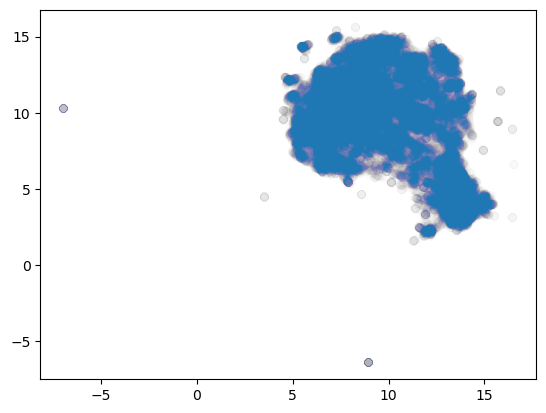

In [12]:
plt.scatter(x = mapper[:, 0], y = mapper[:, 1], alpha = 0.002)
plt.show()

In [13]:
df_embeddings["UMAP1"] = mapper[:, 0]
df_embeddings["UMAP2"] = mapper[:, 1]

C:\Users\svalb\AppData\Local\Temp\ipykernel_12616\1084501945.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\svalb\AppData\Local\Temp\ipykernel_12616\1084501945.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [33]:
df

,PMID,Abstract
0,10217319,In 1996 131.5 million daily doses of preparati...
1,10217320,"The bactericidal activity of OPB-2045 (1-(3,4-..."
2,10217321,Cell-surface hydrophobicity is different for S...
3,10217322,This study examines the anti-ulcerogenic activ...
4,10217323,We studied the effects of lavender oil on mast...
...,...,...
99995,10416799,Quantitative estimation of brain glucose metab...
99996,10416800,For certain medical applications resampling of...
99997,10416801,In order to perform attenuation correction in ...
99998,10416802,The registration of retinal images is required...


In [36]:
df_UMAP = df_embeddings[["PMID", "UMAP1", "UMAP2"]]
df_UMAP["Title"] = df["Title"]

In [37]:
fig = px.line(df_UMAP, x="UMAP1", y="UMAP2", hover_data = ["Title", "PMID"])
fig.update_traces(mode="markers")
fig.show()

In [38]:
df_mxbai = pd.read_csv(r"C:\Users\svalb\Downloads\output_prueba_embeddings_mxbai.csv")

In [39]:
colnames_mxbai = []
for el in range(1024):
    colnames_mxbai.append("Embedding_"+str(el))

In [40]:
df_mxbai["AbstractEmbedding_list"] = df_mxbai["AbstractEmbedding"].apply(ast.literal_eval)

In [41]:
df_mxbai[colnames_mxbai] = df_mxbai["AbstractEmbedding_list"].to_list()

C:\Users\svalb\AppData\Local\Temp\ipykernel_12616\1287791082.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\svalb\AppData\Local\Temp\ipykernel_12616\1287791082.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\svalb\AppData\Local\Temp\ipykernel_12616\1287791082.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [42]:
pca_mxbai = sklearn.decomposition.PCA()
pca_mxbai.fit_transform(df_mxbai[colnames_mxbai])

array([[-2.16871616e+00,  9.74802262e-01, -8.12131191e-01, ...,
         5.78250235e-03, -1.72688571e-02,  1.98542453e-07],
       [-2.24404287e+00,  5.00202950e-01, -2.19876252e+00, ...,
         3.49991662e-02,  4.32716675e-02, -2.51669662e-07],
       [-2.77970349e+00, -2.09752015e+00, -2.31937269e+00, ...,
         8.09159157e-02,  5.42373525e-03,  1.65822307e-07],
       ...,
       [ 7.22137983e-01,  1.21026010e+00,  5.01235625e-01, ...,
        -4.16649534e-02, -1.53363335e-03, -1.46207322e-07],
       [ 4.40384394e-01, -1.22746719e+00,  1.45524774e+00, ...,
         5.89681568e-04,  2.43824701e-02,  1.32499166e-07],
       [ 6.32097809e-01,  3.70285412e-01, -5.41294689e-01, ...,
        -2.92338708e-02,  7.97138625e-02, -4.35927784e-08]])

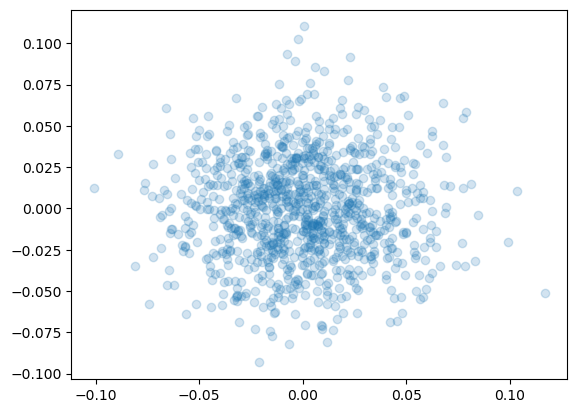

In [43]:
plt.scatter(x= pca_mxbai.components_[0], y= pca_mxbai.components_[1], alpha=0.2)
plt.show()

In [44]:
pca_mxbai.explained_variance_ratio_

array([8.33120364e-02, 3.34844836e-02, 3.00715732e-02, ...,
       6.77704847e-06, 6.27580419e-06, 1.36379936e-16])

In [45]:
mapper_mxbai = umap.UMAP().fit_transform(df_mxbai[colnames_mxbai])

C:\Users\svalb\anaconda3\envs\env_sci-abstract-graphs\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



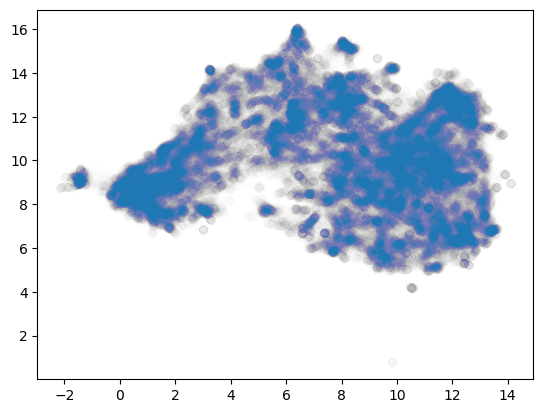

In [46]:
plt.scatter(x = mapper_mxbai[:, 0], y = mapper_mxbai[:, 1], alpha = 0.002)
plt.show()

In [47]:
df_mxbai["UMAP1"] = mapper_mxbai[:, 0]
df_mxbai["UMAP2"] = mapper_mxbai[:, 1]

C:\Users\svalb\AppData\Local\Temp\ipykernel_12616\3820295759.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\svalb\AppData\Local\Temp\ipykernel_12616\3820295759.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [48]:
df_UMAP_mxbai = df_mxbai[["PMID", "UMAP1", "UMAP2"]]
df_UMAP_mxbai["Title"] = df["Title"]

In [49]:
fig = px.line(df_UMAP_mxbai, x="UMAP1", y="UMAP2", hover_data = ["Title", "PMID"])
fig.update_traces(mode="markers")
fig.show()